# Binary Classification with Kaggle's Titanic Data

## Pre-Processing


Data Dictionary

-	survival	Survival	0 = No, 1 = Yes
-	pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
-	sex	Sex	
-	Age	Age in years	
-	sibsp	# of siblings / spouses aboard the Titanic	
-	parch	# of parents / children aboard the Titanic	
-	ticket	Ticket number	
-	fare	Passenger fare	
-	cabin	Cabin number	
-	embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [79]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

%matplotlib inline

# to make this notebook's output identical at every run
np.random.seed(42)

In [62]:
# load the train.csv as a dataframe. Ignoring PassengerId, Name, Ticket and Cabin features.
df = pd.read_csv("data/train.csv",  usecols=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"])

In [65]:
# Descibe and visulaize initially loaded dataframe
print(df.head())
df.info()
df.describe()

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C91906C0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C919A4D898>]], dtype=object)

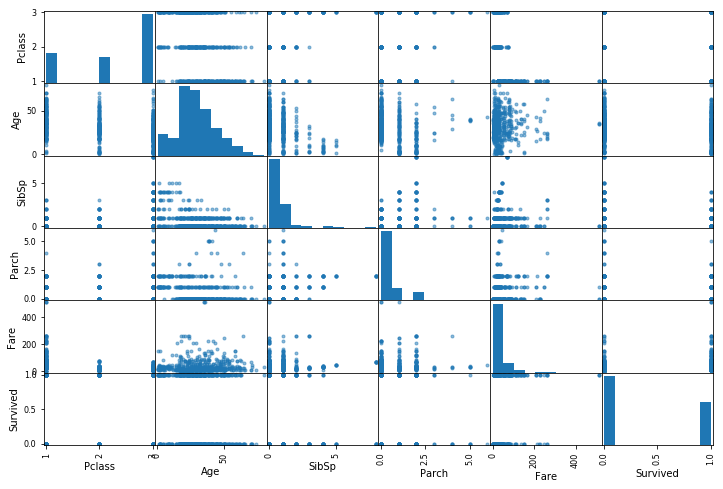

In [66]:
# Scatter plot of all attriutes
attributes = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]
scatter_matrix(df[attributes], figsize=(12, 8))

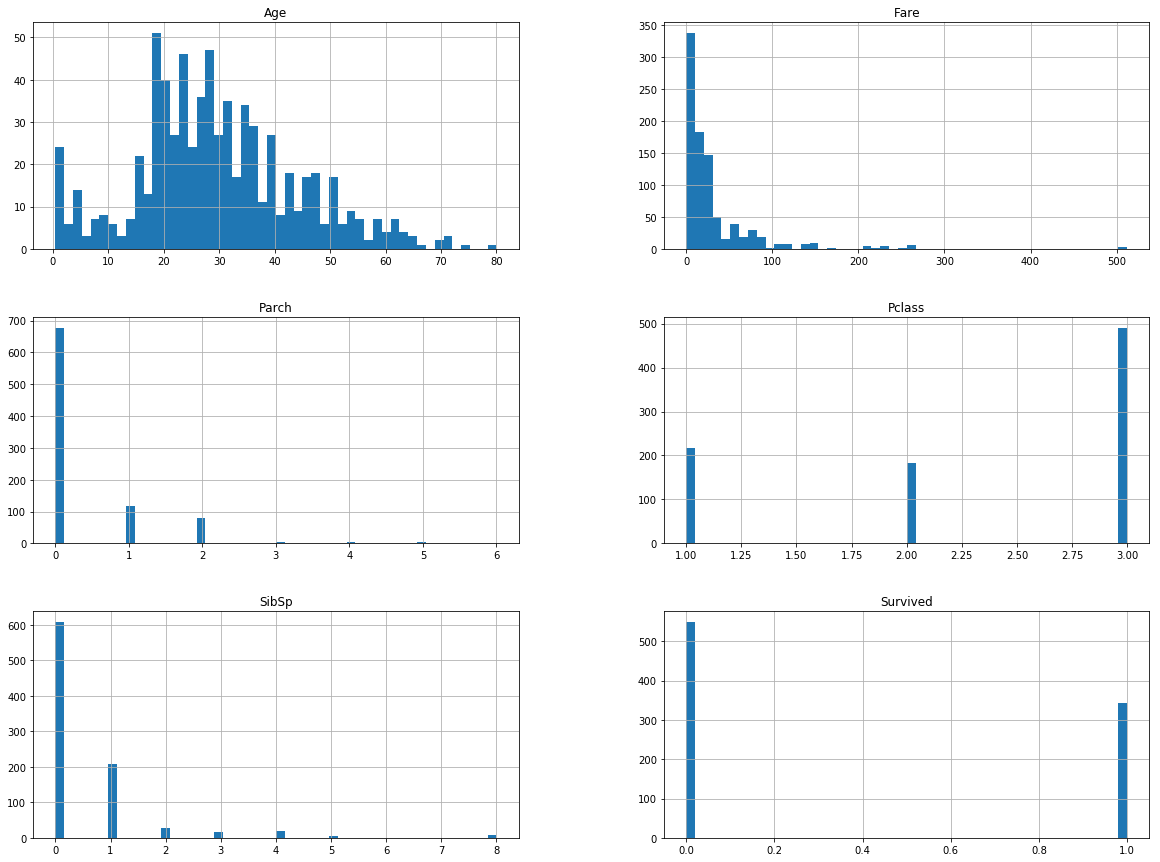

In [67]:
# Histrogram
df.hist(bins=50, figsize=(20,15))
plt.show()

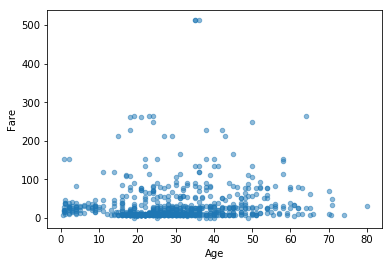

In [68]:
# Compare individual attributes
df.plot(x="Age", y="Fare", kind="scatter", alpha=0.5)
plt.show()

In [69]:
# Correlations in the data
corr_matrix = df.corr()
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64


In [59]:
# Create Training data
x_train = df.drop("Survived", axis=1) # drop labels for training set
y_train = df["Survived"].copy()

In [61]:
# Find columns containing nan values (print(df.iloc[[5]]) to view any particular row)
#df.isnull().any() # Age and Embarked have nan values
df.isnull().sum() # Age has 177 nan entries and Embarked has 2 entries.

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [74]:
# drop rows which have embarked as nan (since only 2 entries have embarked = nan)
x_train_cleaned = x_train.dropna(subset=["Embarked"])
x_train_cleaned.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [77]:
# Handle 'Sex' attribute (Text and Categorical attributes)
sex_encoder = LabelEncoder()
x_train_cleaned["Sex"] = sex_encoder.fit_transform(x_train_cleaned["Sex"])
print(sex_encoder.classes_) # Prints the class mapping
x_train_cleaned.head()

[0 1]


C:\Users\eshan\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [78]:
# Handle 'Embarked' attribute (Text and Categorical attributes)
embarked_encoder = LabelEncoder()
x_train_cleaned["Embarked"] = embarked_encoder.fit_transform(x_train_cleaned["Embarked"])
print(embarked_encoder.classes_) # Prints the class mapping
x_train_cleaned.info()

['C' 'Q' 'S']


C:\Users\eshan\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [90]:
x_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Pclass      889 non-null int64
Sex         889 non-null int64
Age         712 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


In [91]:
#print("BEFORE:")
#x_train_cleaned.isnull().sum()

# Use imputer to handle missing Age values (nan) and replace with median values. 
# NOTE : This will apply the imputer on all numerical attributes
imputer = Imputer(strategy="median")
imputer.fit(x_train_cleaned)

# Verify that trained imputer has the right median values
print("IMPUTER STATISTICS: %s" % (imputer.statistics_))
print("MEDIAN VALUES: %s" % (x_train_cleaned.median().values))

X = imputer.transform(x_train_cleaned)
x_train_transformed = pd.DataFrame(X, columns=x_train_cleaned.columns)

#print("AFTER:")
#x_train_transformed.isnull().sum()

BEFORE:
IMPUTER STATISTICS: [  3.       1.      28.       0.       0.      14.4542   2.    ]
MEDIAN VALUES: [  3.       1.      28.       0.       0.      14.4542   2.    ]
AFTER:


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64